This is not my code, I took it from https://www.kaggle.com/code/sergey18650/cnn-animals-acc-95.

In [25]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from sklearn import metrics

Image Class Separation

In [26]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    'data/afhq/train',
    seed=123,
    image_size=(512, 512),
    batch_size=32,
    validation_split=0.1,
    subset='training'
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    'data/afhq/train',
    seed=123,
    image_size=(512, 512),
    batch_size=32,
    validation_split=0.1,
    subset='validation'
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    'data/afhq/val', 
    seed=123,
    image_size=(512, 512),
    batch_size=1,
    shuffle=False
)

Found 14630 files belonging to 3 classes.
Using 13167 files for training.
Found 14630 files belonging to 3 classes.
Using 1463 files for validation.
Found 1500 files belonging to 3 classes.


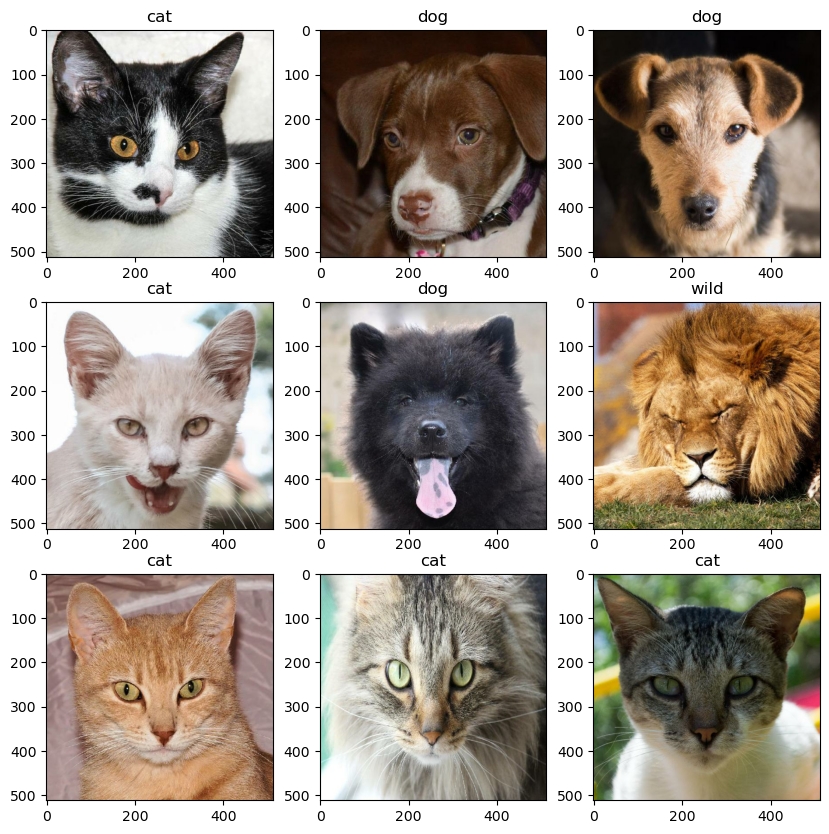

In [27]:
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])           
        plt.axis("on")

Model Construction.

In [28]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Normalization())

model.add(tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3), strides=(1,1), name= 'conv2d_1',padding='same', data_format='channels_last', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), name='conv2d_2',padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), name='conv2d_3',padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), name='conv2d_4',padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), name='conv2d_5',padding='same', activation='relu'))
# model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), name='conv2d_5',padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(units=300, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(units=3, activation='softmax'))

In [29]:
tf.random.set_seed(1)
# model.build(input_shape=(None,128,128,3))
model.build(input_shape=(None,512,512,3))
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_3 (Normalizati (None, 512, 512, 3)       7         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 512, 512, 8)       224       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 256, 256, 8)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 16)      1168      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 64, 64, 32)       

Training and Evaluation

In [30]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10, shuffle=True)

Epoch 1/10
412/412 [==============================] - 46s 110ms/step - loss: 1.5657 - accuracy: 0.7975 - val_loss: 0.2085 - val_accuracy: 0.9419
Epoch 2/10
412/412 [==============================] - 47s 113ms/step - loss: 0.2038 - accuracy: 0.9246 - val_loss: 0.1682 - val_accuracy: 0.9364
Epoch 3/10
412/412 [==============================] - 47s 113ms/step - loss: 0.1493 - accuracy: 0.9462 - val_loss: 0.1164 - val_accuracy: 0.9569
Epoch 4/10
412/412 [==============================] - 47s 114ms/step - loss: 0.1087 - accuracy: 0.9587 - val_loss: 0.1260 - val_accuracy: 0.9576
Epoch 5/10
412/412 [==============================] - 47s 114ms/step - loss: 0.0720 - accuracy: 0.9749 - val_loss: 0.1253 - val_accuracy: 0.9597
Epoch 6/10
412/412 [==============================] - 47s 114ms/step - loss: 0.0714 - accuracy: 0.9752 - val_loss: 0.1888 - val_accuracy: 0.9405
Epoch 7/10
412/412 [==============================] - 46s 112ms/step - loss: 0.0780 - accuracy: 0.9737 - val_loss: 0.1543 - val_ac

In [31]:
model.evaluate(train_ds)
model.evaluate(val_ds)
model.evaluate(test_ds)

1500/1500 [==============================] - 7s 5ms/step - loss: 0.1796 - accuracy: 0.9613


[0.17959582805633545, 0.9613333344459534]

Text(0.5, 0, 'Epoch')

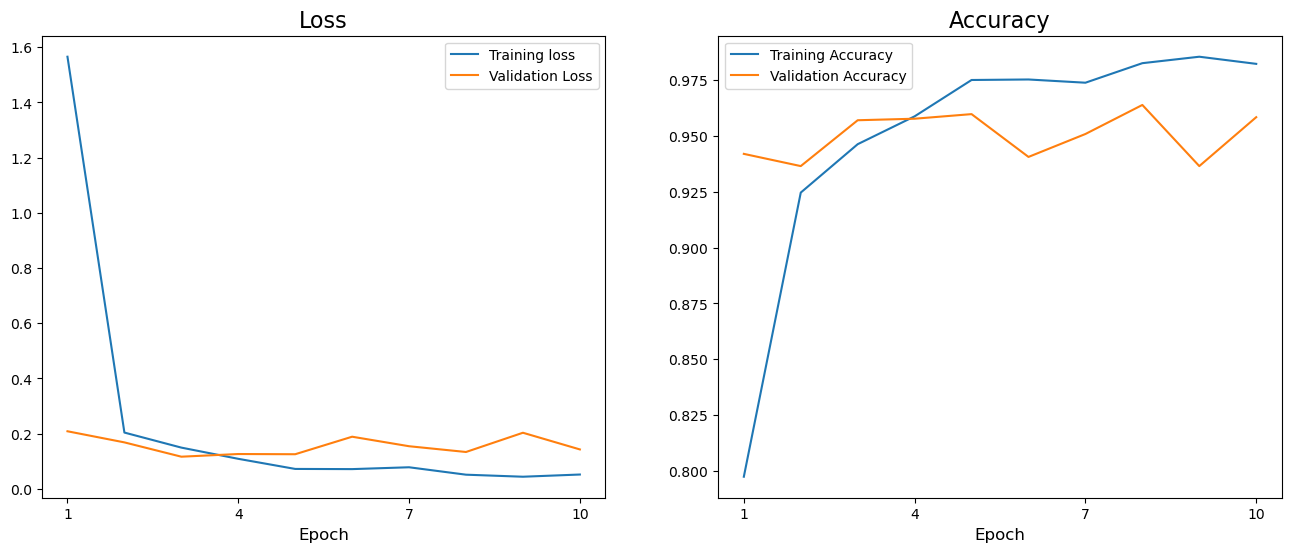

In [32]:
epochs=10

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
title_fontsize = 16
axis_fontsize = 12

ax1.plot(range(1,epochs+1), history.history['loss'], label='Training loss')
ax1.plot(range(1,epochs+1), history.history['val_loss'], label='Validation Loss')
ax1.legend()
ax1.set_xticks(range(1,epochs+1,3))
ax1.set_title('Loss', fontsize=title_fontsize)
ax1.set_xlabel('Epoch', fontsize=axis_fontsize)

ax2.plot(range(1,epochs+1), history.history['accuracy'], label='Training Accuracy')
ax2.plot(range(1,epochs+1), history.history['val_accuracy'], label='Validation Accuracy')
ax2.legend()
ax2.set_xticks(range(1,epochs+1,3))
ax2.set_title('Accuracy', fontsize=title_fontsize)
ax2.set_xlabel('Epoch', fontsize=axis_fontsize)

Classification Report

In [33]:
y_pred = model.predict(test_ds)
predicate_classes = np.argmax(y_pred, axis=1)

y_test = []
for image, label in test_ds:
    for i in label:
        y_test.append(i.numpy())
print(metrics.classification_report(y_test, predicate_classes))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       500
           1       0.95      0.97      0.96       500
           2       0.96      0.95      0.96       500

    accuracy                           0.96      1500
   macro avg       0.96      0.96      0.96      1500
weighted avg       0.96      0.96      0.96      1500



In [34]:
print(predicate_classes)

[0 0 0 ... 0 2 1]


Save Model

In [35]:
model.save('cat_dog_wild_tf_model')

INFO:tensorflow:Assets written to: cat_dog_wild_tf_model\assets
